<a href="https://colab.research.google.com/github/YISHU19/Personal/blob/main/DL2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Flatten
import cv2
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
(x_train0, y_train0),(x_test0, y_test0) = cifar10.load_data()

In [ ]:
x_train = x_train0 / 255.0
x_test = x_test0 / 255.0

In [ ]:
x_train.shape

(50000, 32, 32, 3)

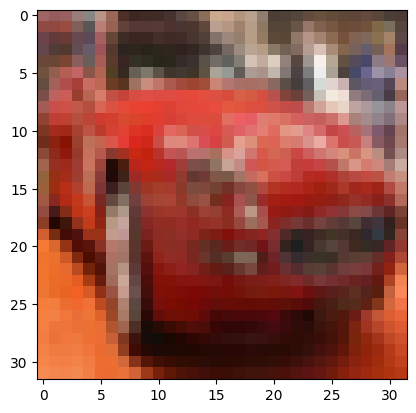

In [ ]:
img = Image.fromarray(x_train0[5])
plt.imshow(img)

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train0, y_train0, batch_size=128, epochs=10)

Epoch 1/10
391/391 [==============================] - 26s 66ms/step - loss: 1.7118 - accuracy: 0.3957
Epoch 2/10
391/391 [==============================] - 17s 44ms/step - loss: 1.7288 - accuracy: 0.3894
Epoch 3/10
391/391 [==============================] - 14s 35ms/step - loss: 1.7107 - accuracy: 0.3956
Epoch 4/10
391/391 [==============================] - 13s 34ms/step - loss: 1.7266 - accuracy: 0.3897
Epoch 5/10
391/391 [==============================] - 13s 34ms/step - loss: 1.6890 - accuracy: 0.4017
Epoch 6/10
391/391 [==============================] - 13s 34ms/step - loss: 1.7240 - accuracy: 0.3874
Epoch 7/10
391/391 [==============================] - 13s 34ms/step - loss: 1.7559 - accuracy: 0.3725
Epoch 8/10
391/391 [==============================] - 14s 35ms/step - loss: 1.7053 - accuracy: 0.3906
Epoch 9/10
391/391 [==============================] - 13s 34ms/step - loss: 1.6784 - accuracy: 0.3977
Epoch 10/10
391/391 [==============================] - 13s 34ms/step - loss: 1.660

In [ ]:
scores = model.evaluate(x_test0, y_test0, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 2s 6ms/step - loss: 208.0946 - accuracy: 0.1047
Test loss: 208.0946044921875
Test accuracy: 0.1046999990940094


In [ ]:
predictions = model.predict(x_test)

313/313 [==============================] - 3s 10ms/step


NameError: ignored

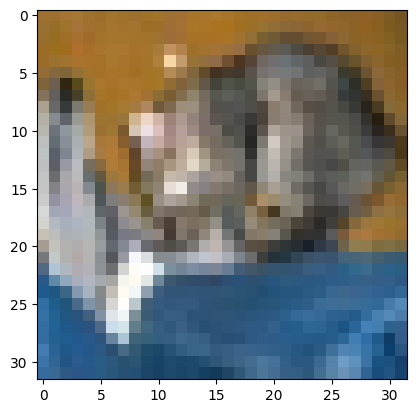

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

for i in range(6):
    img = Image.fromarray(x_test0[i], "RGB")
    plt.imshow(img)
    predicted_label = np.argmax(predictions[i])
    #print(classes[predicted_label])
    plt.text(0, -5, f"Predicted: {classes[predicted_label]}", color='red')  # Add predicted label as text
    plt.axis('off')  # Remove axis ticks
    plt.show()